<a href="https://colab.research.google.com/github/Nivethanajacob/ict_project1/blob/main/Car_Price_Prediction_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import pickle

#Dataset

In [3]:
car_price=pd.read_csv('/content/car_prediction_data.csv')
car_price

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


#EDA

In [4]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_price.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#Preprocessing

In [6]:
car_price.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [7]:
car_price.duplicated().sum()

np.int64(2)

In [8]:
car_price=car_price.drop("Car_Name",axis=1)

In [9]:
car_price.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


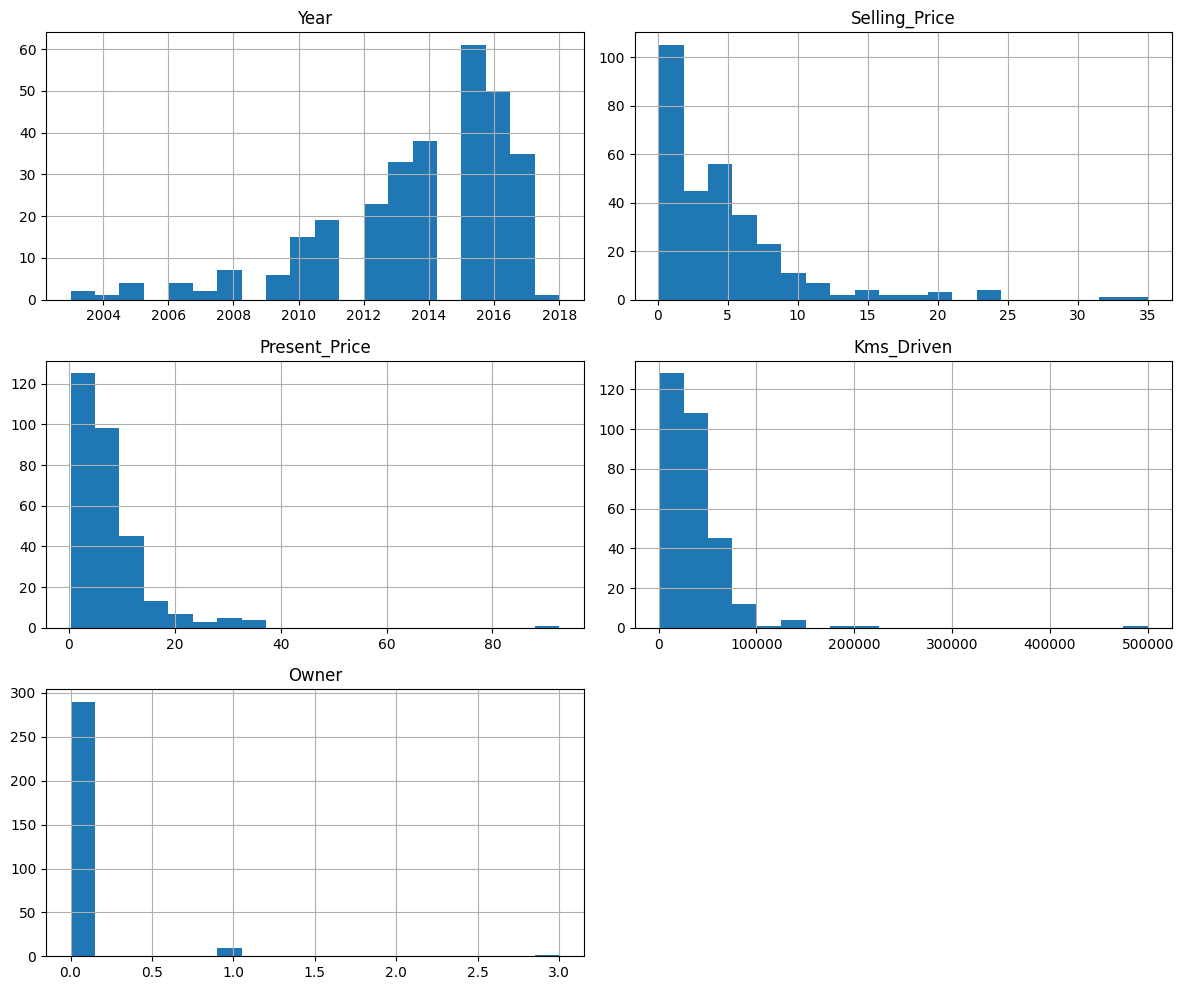

In [12]:
car_price.select_dtypes(include=["number"]).hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

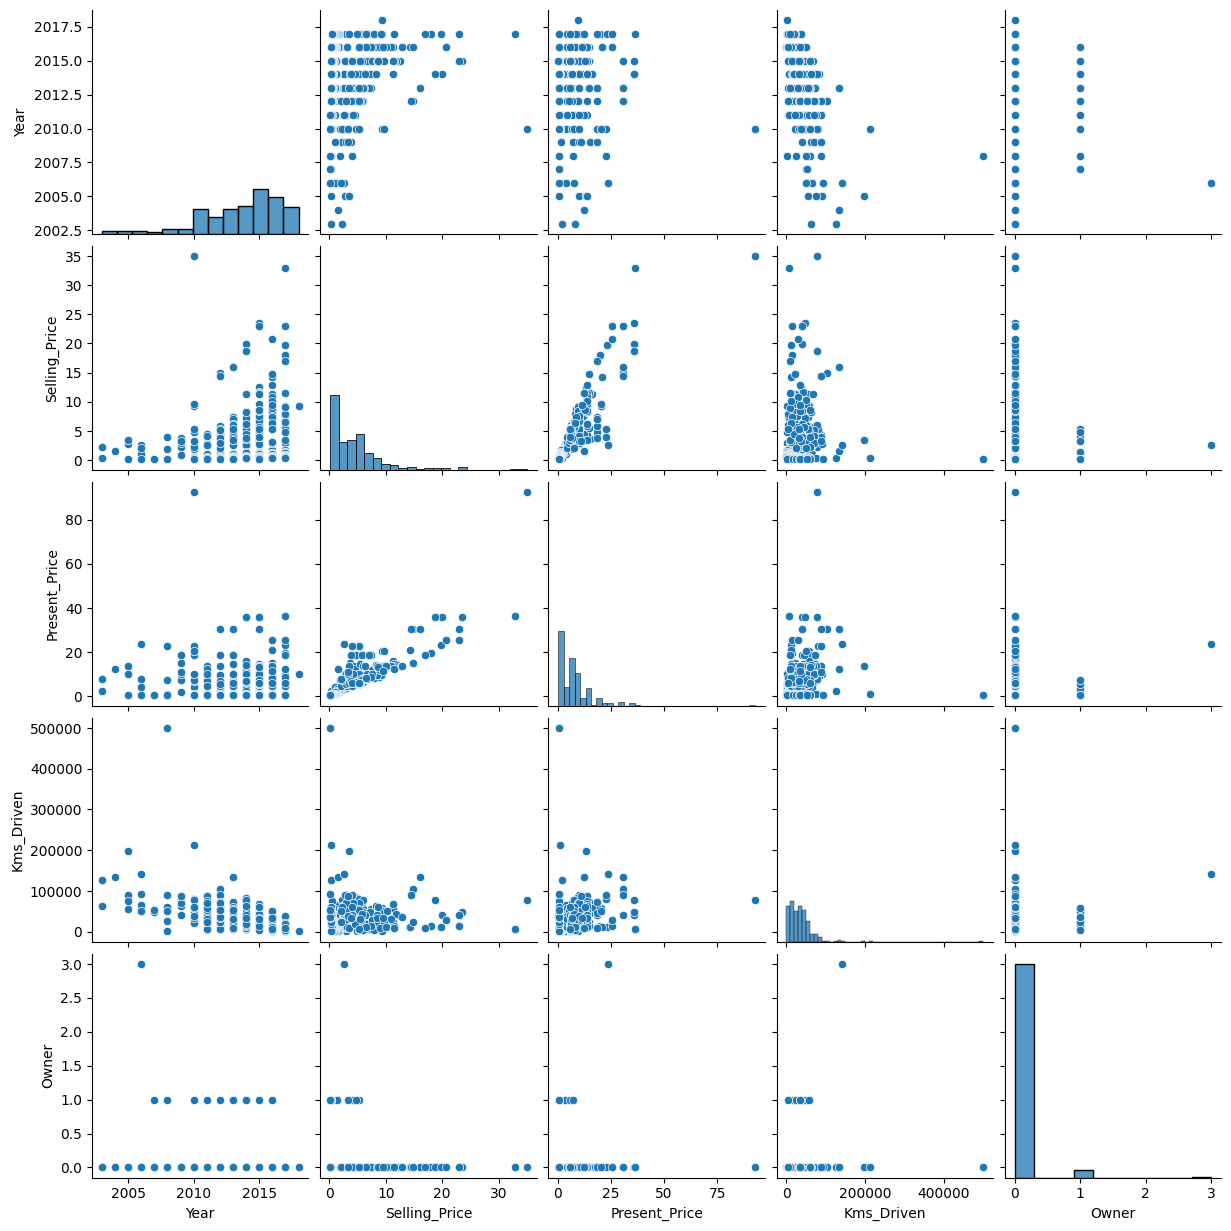

In [13]:
sns.pairplot(car_price)
plt.show()

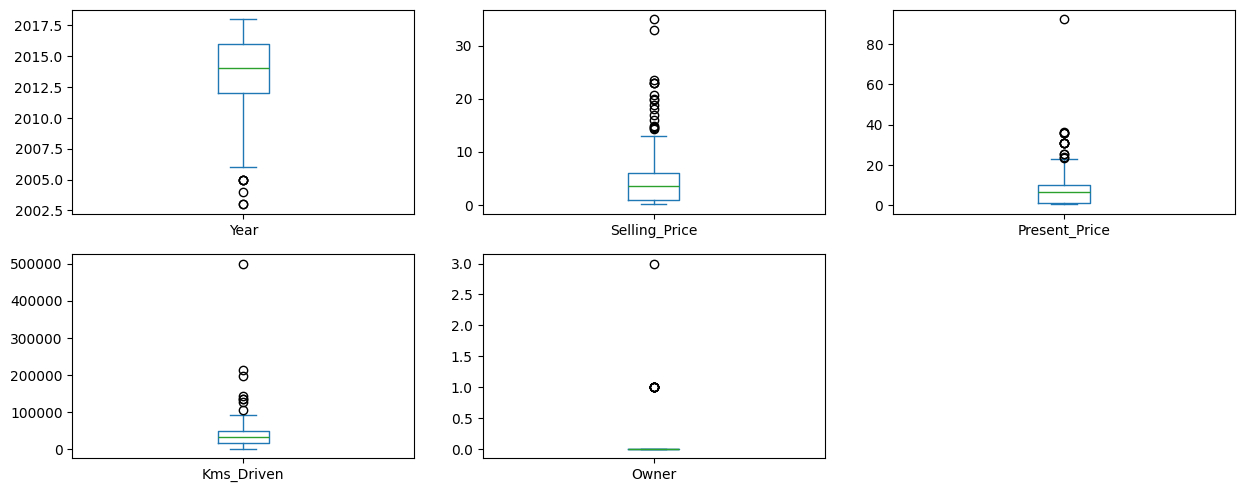

In [15]:
car_price.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,9))
plt.show()

#Outlier

In [17]:
Q1 = car_price['Kms_Driven'].quantile(0.25)
Q3= car_price['Kms_Driven'].quantile(0.75)
IQR =Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
car_price=car_price[(car_price['Kms_Driven']>=lower_bound) & (car_price['Kms_Driven']<=upper_bound)]

#Log transformation

In [21]:
car_price['Present_Price_log']=np.log(car_price['Present_Price'])

/tmp/ipython-input-3692300871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_price['Present_Price_log']=np.log(car_price['Present_Price'])


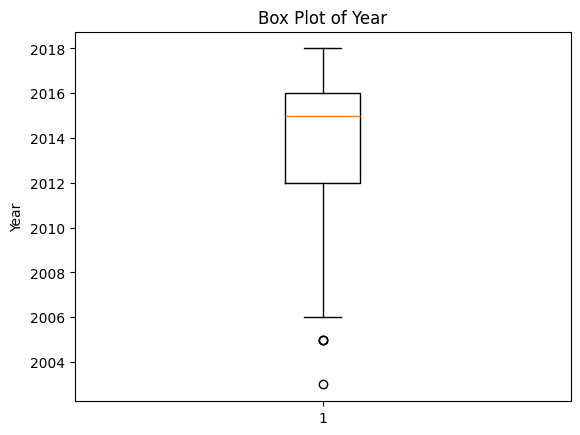

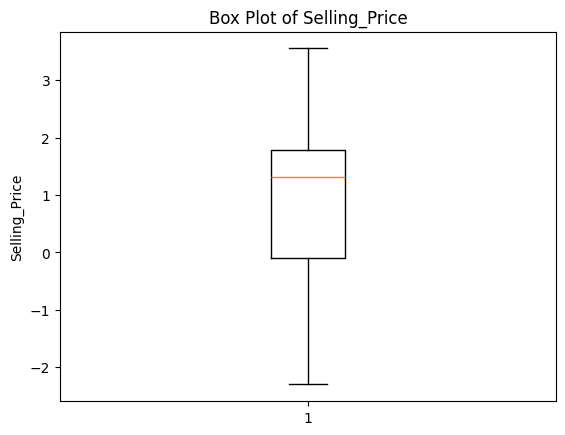

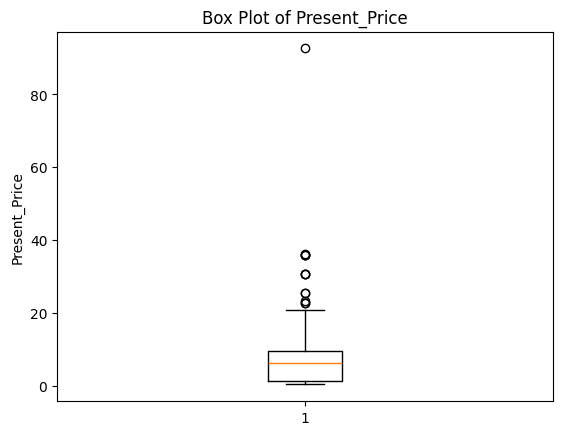

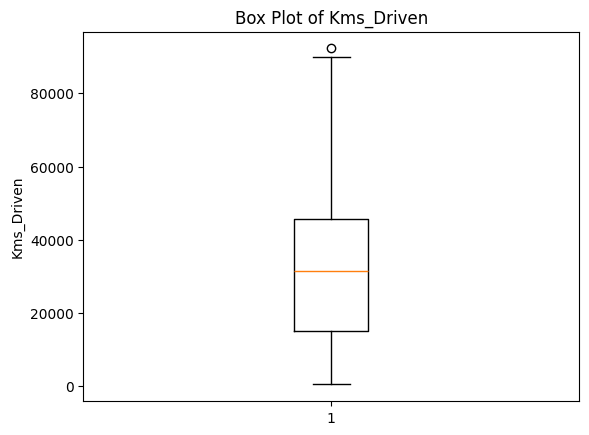

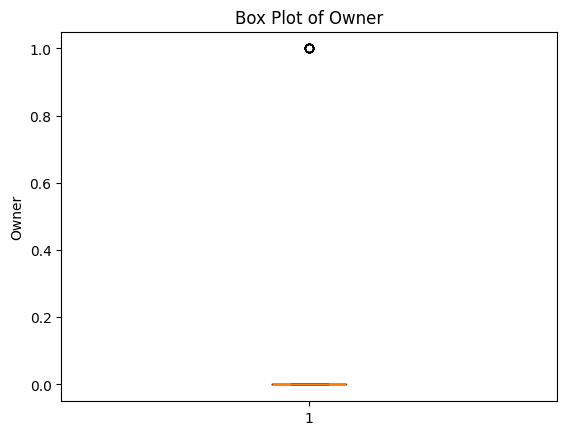

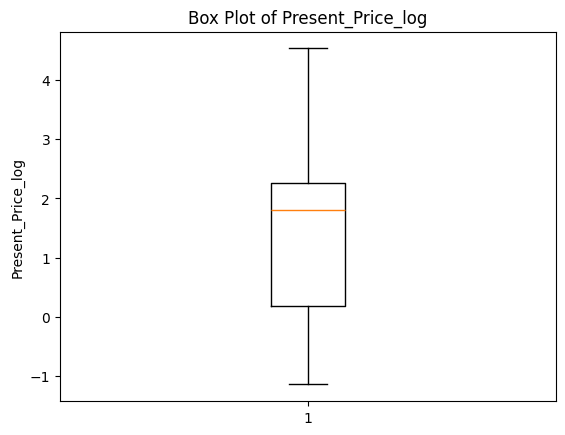

In [22]:
num_cols =car_price.select_dtypes(include=["number"]).columns
for col in num_cols:
  plt.figure()
  plt.boxplot(car_price[col])
  plt.title(f'Box Plot of {col}')
  plt.ylabel(col)
  plt.show()

#Encoding

In [23]:
car_price_encoded=pd.get_dummies(car_price,drop_first=True)
car_price_encoded

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Present_Price_log,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,1.208960,5.59,27000,0,1.720979,False,True,False,True
1,2013,1.558145,9.54,43000,0,2.255493,True,False,False,True
2,2017,1.981001,9.85,6900,0,2.287471,False,True,False,True
3,2011,1.047319,4.15,5200,0,1.423108,False,True,False,True
4,2014,1.526056,6.87,42450,0,1.927164,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
296,2016,2.251292,11.60,33988,0,2.451005,True,False,False,True
297,2015,1.386294,5.90,60000,0,1.774952,False,True,False,True
298,2009,1.208960,11.00,87934,0,2.397895,False,True,False,True
299,2017,2.442347,12.50,9000,0,2.525729,True,False,False,True


#Scaling

In [24]:
scalar=MinMaxScaler()
car_price_scaled=scalar.fit_transform(car_price_encoded)
car_price_scaled=pd.DataFrame(car_price_scaled,columns=car_price_encoded.columns)
car_price_scaled

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Present_Price_log,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.733333,0.599451,0.057109,0.288882,0.0,0.504685,0.0,1.0,0.0,1.0
1,0.666667,0.659060,0.099913,0.463301,0.0,0.598993,1.0,0.0,0.0,1.0
2,0.933333,0.731245,0.103273,0.069768,0.0,0.604635,0.0,1.0,0.0,1.0
3,0.533333,0.571858,0.041504,0.051236,0.0,0.452129,0.0,1.0,0.0,1.0
4,0.733333,0.653582,0.070980,0.457305,0.0,0.541064,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
288,0.866667,0.777386,0.122237,0.365059,0.0,0.633489,1.0,0.0,0.0,1.0
289,0.800000,0.629724,0.060468,0.648622,0.0,0.514208,0.0,1.0,0.0,1.0
290,0.400000,0.599451,0.115735,0.953136,0.0,0.624118,0.0,1.0,0.0,1.0
291,0.933333,0.810001,0.131990,0.092660,0.0,0.646673,1.0,0.0,0.0,1.0


#Split

In [26]:
X=car_price_scaled.drop("Selling_Price",axis=1)
y=car_price_scaled["Selling_Price"]

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((234, 9), (59, 9), (234,), (59,))

#Linear Regression

In [29]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [32]:
pickle.dump(lin_reg,open('carprice_reg.pkl','wb'))
pickle.dump(scalar,open('scaling.pkl','wb'))
pickle.dump(X.columns,open('columns.pkl','wb'))


In [33]:
model_data=RandomForestRegressor(n_estimators=100,random_state=42)
model_data.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [35]:
pickle.dump(model_data,open('carprice_model.pkl','wb'))